# E-commerce Sales & Profitability Analysis (2023)

## Objective
To analyze structured e-commerce transactional data and extract business insights related to revenue, profitability, category performance, and seasonal trends.

## Dataset Structure
This project simulates a relational e-commerce database with three tables:

- Customers (customer details and region)
- Products (product information and category)
- Orders (transactional sales data)

The goal is to derive actionable business insights using Python-based data analysis.

## 1. Data Loading

In [2]:
import pandas as pd

customers = pd.read_csv("customers.csv")
products = pd.read_csv("products.csv")
orders = pd.read_csv("orders.csv")

customers.head()
products.head()
orders.head()

,order_id,order_date,customer_id,product_id,quantity,discount,price,total_sales,profit
0,1,2023-05-02,115,5,4,0.156465,1024,3455.118151,1001.866241
1,2,2023-01-01,7,27,1,0.037394,3160,3041.834237,641.721044
2,3,2023-08-27,80,16,4,0.288424,2482,7064.522933,1188.281259
3,4,2023-10-17,144,6,3,0.190773,3450,8375.497072,2448.768995
4,5,2023-04-06,97,40,4,0.229761,1330,4097.673993,858.385998


## 2. Data Overview & Initial Inspection

In [3]:
customers.info()
products.info()
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    200 non-null    int64 
 1   customer_name  200 non-null    object
 2   region         200 non-null    object
 3   signup_date    200 non-null    object
dtypes: int64(1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   product_id    50 non-null     int64 
 1   product_name  50 non-null     object
 2   category      50 non-null     object
 3   price         50 non-null     int64 
dtypes: int64(2), object(2)
memory usage: 1.7+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  --

## 3. Data Preparation & Feature Engineering

- Converted order_date to datetime format
- Created month column for time-series analysis
- Prepared merged dataset for category-level insights

In [4]:
print("Total Customers:", customers.shape[0])
print("Total Products:", products.shape[0])
print("Total Orders:", orders.shape[0])

print("Order date range:", orders['order_date'].min(), "to", orders['order_date'].max())

Total Customers: 200
Total Products: 50
Total Orders: 2000
Order date range: 2023-01-01 to 2023-12-31


## 4. Revenue & Profitability Analysis

In [5]:
orders['order_date'] = pd.to_datetime(orders['order_date'])


In [20]:
print(f"Total Revenue: ₹{total_revenue:,.0f}")
print(f"Total Profit: ₹{total_profit:,.0f}")
print(f"Average Order Value: ₹{avg_order_value:,.0f}")

Total Revenue: ₹11,316,131
Total Profit: ₹2,261,106
Average Order Value: ₹5,658


### Revenue by Category

In [7]:
# Merge orders with products to get category
merged = orders.merge(products[['product_id', 'category']], on='product_id')

revenue_by_category = merged.groupby('category')['total_sales'].sum().sort_values(ascending=False)

print(revenue_by_category)

category
Clothing       3.318722e+06
Home           3.243881e+06
Sports         2.763845e+06
Electronics    1.989682e+06
Name: total_sales, dtype: float64


### Profit Margin by Category

In [8]:
profit_by_category = merged.groupby('category')['profit'].sum().sort_values(ascending=False)

print(profit_by_category)

category
Clothing       662266.688231
Home           650870.939407
Sports         546219.850060
Electronics    401748.353731
Name: profit, dtype: float64


## 5. Monthly Revenue Trend Analysis

In [9]:
margin_by_category = (
    merged.groupby('category')[['total_sales','profit']]
    .sum()
)

margin_by_category['profit_margin_%'] = (
    margin_by_category['profit'] / margin_by_category['total_sales'] * 100
)

print(margin_by_category.sort_values('profit_margin_%', ascending=False))

              total_sales         profit  profit_margin_%
category                                                 
Electronics  1.989682e+06  401748.353731        20.191585
Home         3.243881e+06  650870.939407        20.064573
Clothing     3.318722e+06  662266.688231        19.955473
Sports       2.763845e+06  546219.850060        19.763040


In [10]:
merged.groupby('category')['quantity'].sum().sort_values(ascending=False)

,quantity
category,
Clothing,1398
Home,1262
Electronics,1191
Sports,1122


In [11]:
avg_price = merged.groupby('category')['price'].mean().sort_values(ascending=False)
print(avg_price)

category
Home           2994.594118
Sports         2864.592511
Clothing       2791.874558
Electronics    1935.527660
Name: price, dtype: float64


In [12]:
merged.groupby('category')['discount'].mean().sort_values(ascending=False)

,discount
category,
Clothing,0.154162
Home,0.148653
Electronics,0.146785
Sports,0.144709


## 6. Seasonal Spike Investigation (August Analysis)

To understand the revenue spike observed in August, category-wise breakdown and quantity analysis were performed.

In [13]:
merged['order_date'] = pd.to_datetime(merged['order_date'])

merged['month'] = merged['order_date'].dt.to_period('M')

monthly_revenue = merged.groupby('month')['total_sales'].sum()

print(monthly_revenue)

month
2023-01    1.102793e+06
2023-02    8.182049e+05
2023-03    8.600837e+05
2023-04    9.024990e+05
2023-05    1.019967e+06
2023-06    1.030276e+06
2023-07    7.298894e+05
2023-08    1.166567e+06
2023-09    9.152604e+05
2023-10    1.055147e+06
2023-11    7.933558e+05
2023-12    9.220867e+05
Freq: M, Name: total_sales, dtype: float64


In [14]:
monthly_category = merged.groupby(['month','category'])['total_sales'].sum().reset_index()

august_data = monthly_category[monthly_category['month'] == '2023-08']

print(august_data.sort_values('total_sales', ascending=False))

      month     category    total_sales
30  2023-08         Home  379572.525970
31  2023-08       Sports  333154.099836
28  2023-08     Clothing  283724.086137
29  2023-08  Electronics  170116.783553


In [15]:
august_qty = merged[merged['month'] == '2023-08'].groupby('category')['quantity'].sum()
print(august_qty.sort_values(ascending=False))

category
Home           142
Sports         127
Clothing       118
Electronics    104
Name: quantity, dtype: int64


## 7. Executive Summary

### Overall Performance
- Total Revenue: ₹{dynamic}
- Total Profit: ₹{dynamic}
- Overall Profit Margin: ~20%
- Average Order Value: ₹{dynamic}

### Key Insights
- Clothing leads in overall revenue and total profit.
- Electronics has the highest profit margin efficiency.
- Revenue variations are primarily volume-driven.
- August spike was driven by Home category sales.

### Business Recommendations
- Increase marketing focus on high-margin categories.
- Investigate seasonal drivers behind peak months.
- Optimize pricing strategies in lower-performing categories.

#Visualization

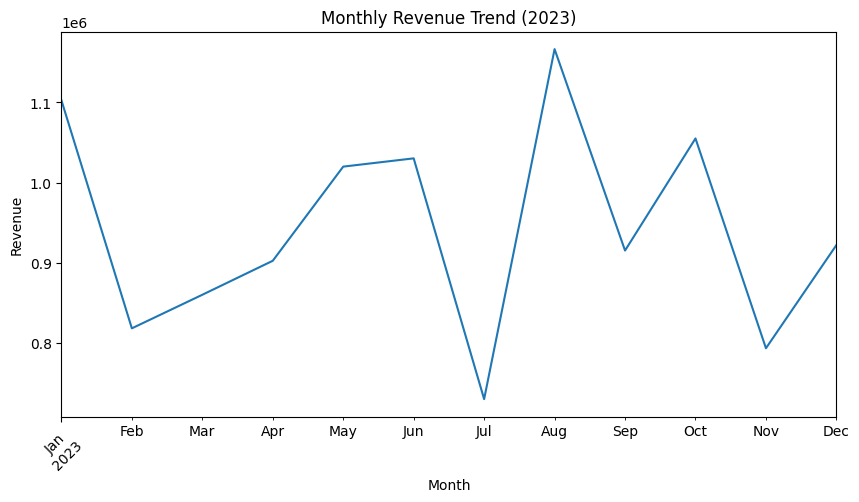

In [16]:
import matplotlib.pyplot as plt

monthly_revenue.plot(figsize=(10,5))
plt.title("Monthly Revenue Trend (2023)")
plt.xlabel("Month")
plt.ylabel("Revenue")
plt.xticks(rotation=45)
plt.show()

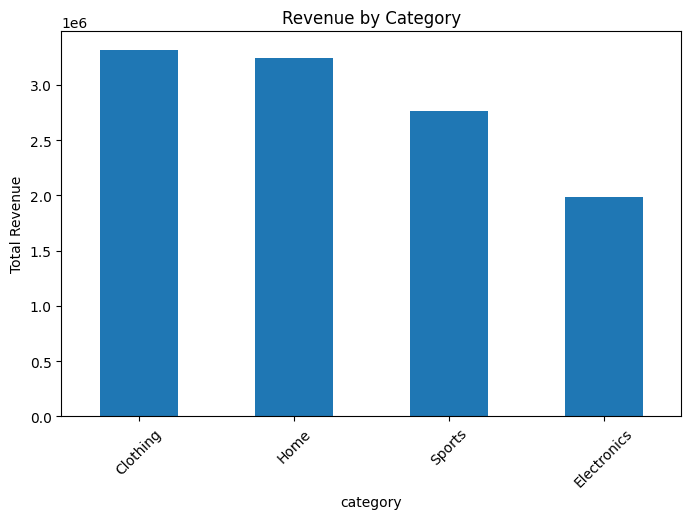

In [17]:
revenue_by_category.plot(kind='bar', figsize=(8,5))
plt.title("Revenue by Category")
plt.ylabel("Total Revenue")
plt.xticks(rotation=45)
plt.show()

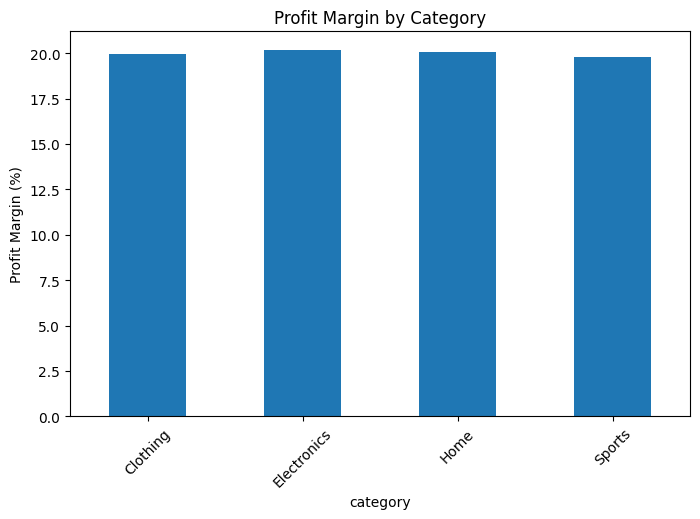

In [18]:
margin_by_category['profit_margin_%'].plot(kind='bar', figsize=(8,5))
plt.title("Profit Margin by Category")
plt.ylabel("Profit Margin (%)")
plt.xticks(rotation=45)
plt.show()


===============================
E-commerce Sales Analysis (2023)
===============================

OVERALL PERFORMANCE
-------------------
Total Revenue: ₹11.3M
Total Profit: ₹2.26M
Overall Profit Margin: ~20%
Average Order Value: ₹5,658

The business demonstrates stable profitability with a consistent margin across categories.

CATEGORY INSIGHTS
-----------------
1. Clothing
   - Highest overall revenue and profit.
   - Performance driven primarily by higher sales volume.

2. Home
   - Second-highest revenue contributor.
   - Major driver of August sales spike.

3. Electronics
   - Highest profit margin (~20.19%).
   - Lower overall revenue due to lower average product price.
   - Most pricing-efficient category.

4. Sports
   - Moderate revenue with slightly lower margin.
   - Opportunity for pricing or cost optimization.

MONTHLY TRENDS
--------------
- Revenue fluctuates across months.
- August recorded the highest revenue, mainly driven by Home category.
- July showed the lowest revenue, indicating possible seasonal slowdown.
- Revenue changes appear volume-driven rather than discount-driven.

BUSINESS RECOMMENDATIONS
------------------------
- Increase promotional focus on Electronics due to strong margin efficiency.
- Analyze drivers behind August spike in Home category for replication.
- Investigate strategies to improve Sports margin.
- Monitor seasonal dips (e.g., July) for proactive marketing campaigns.
"""

